<a href="https://colab.research.google.com/github/pnvijay/walk_with_fastai/blob/main/02_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Nov  3 12:18:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install light-the-torch -qqq
!ltt install torch torchvision -- -qqq
!pip install fastai --upgrade -qqq
import fastai

     |████████████████████████████████| 1.5MB 9.2MB/s 
     |████████████████████████████████| 735.3 MB 22 kB/s 
     |████████████████████████████████| 12.8 MB 48 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0+cu101
    Uninstalling torch-1.6.0+cu101:
      Successfully uninstalled torch-1.6.0+cu101
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.7.0+cu101
    Uninstalling torchvision-0.7.0+cu101:
      Successfully uninstalled torchvision-0.7.0+cu101
     |████████████████████████████████| 188 kB 4.8 MB/s 
     |████████████████████████████████| 45 kB 3.1 MB/s 


In [3]:
fastai.__version__

'2.1.3'

In [5]:
import torch
print(torch.cuda.is_available())

True


In [6]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [7]:
import torchvision
torchvision.__version__

'0.8.1+cu101'

In [8]:
from fastai.basics import *
from fastai.vision.all import *
from fastai.callback.all import *

In [9]:
folders = ['blue_bird', 'red_wing_black_bird', 'blue_jay']
files = ['blue_bird.csv', 'red_wing_black_bird.csv', 'blue_jay.csv']

In [10]:
for x, fname in enumerate(folders):
  path = Path(f'/content/')
  dest = path/fname
  dest.mkdir(parents=True, exist_ok=True)

In [11]:
path.ls()

(#8) [Path('/content/.config'),Path('/content/blue_jay.csv'),Path('/content/red_wing_black_bird'),Path('/content/blue_bird'),Path('/content/blue_bird.csv'),Path('/content/blue_jay'),Path('/content/red_wing_black_bird.csv'),Path('/content/sample_data')]

In [12]:
classes = ['blue_bird', 'red_wing_black_bird','blue_jay']

In [13]:
download_images??

In [14]:
path/files[0]

Path('/content/blue_bird.csv')

In [16]:
for i, n in enumerate(classes):
  print(n)
  # file = open(path/files[i])
  download_images(path/folders[i], path/files[i], max_pics=200)

blue_bird


red_wing_black_bird


blue_jay


In [17]:
# for n in classes:
#   print(n)
#   verify_images(path/n, delete=True)

imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

blue_bird


red_wing_black_bird


blue_jay


In [18]:
imgs

(#23) [Path('/content/blue_bird/00000164.jpg'),Path('/content/blue_bird/00000134.jpg'),Path('/content/blue_bird/00000076.jpg'),Path('/content/blue_bird/00000086.jpg'),Path('/content/blue_bird/00000119.jpg'),Path('/content/blue_bird/00000112.jpg'),Path('/content/blue_bird/00000100.jpg'),Path('/content/blue_bird/00000107.png'),Path('/content/blue_bird/00000126.jpg'),Path('/content/red_wing_black_bird/00000145.jpg')...]

In [19]:
for im in imgs:
  im.unlink()

In [20]:
imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

blue_bird


red_wing_black_bird


blue_jay


In [21]:
imgs

(#0) []

In [22]:
birds = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items=get_image_files,
                  splitter = RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [23]:
dbunch = birds.dataloaders(path,bs=32)

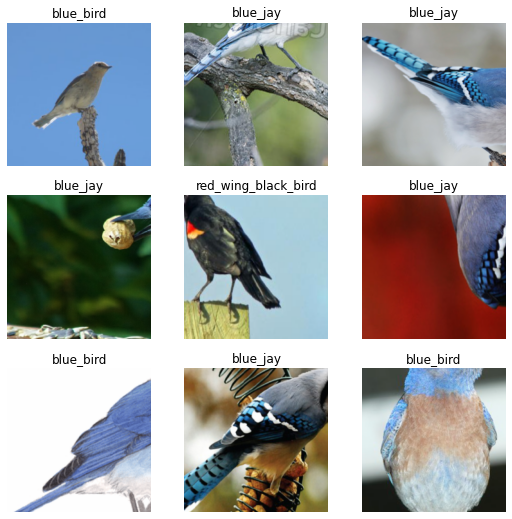

In [24]:
dbunch.show_batch(max_n=9)

In [25]:
dbunch.vocab

['blue_bird', 'blue_jay', 'red_wing_black_bird']

In [26]:
learn = cnn_learner(dbunch,resnet34,pretrained=True,metrics=error_rate)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.302461,0.086577,0.036364,00:11
1,0.912861,0.023311,0.009091,00:11
2,0.679032,0.007375,0.000000,00:11
3,0.521761,0.007602,0.000000,00:11


In [27]:
learn.save('stage_1_34')

Path('models/stage_1_34.pth')

In [28]:
learn.unfreeze()

SuggestedLRs(lr_min=1.9054606673307718e-05, lr_steep=6.309573450380412e-07)

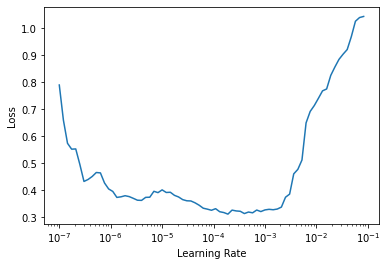

In [29]:
learn.lr_find()

In [31]:
learn.fit_one_cycle(4,lr_max=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.362414,0.005779,0.000000,00:11
1,0.298372,0.007148,0.000000,00:11
2,0.282744,0.010267,0.009091,00:11
3,0.277569,0.012485,0.009091,00:11


In [28]:
learn.save('stage_2_34')

Path('models/stage_2_34.pth')

In [29]:
interp = ClassificationInterpretation.from_learner(learn)

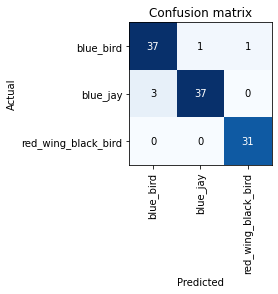

In [30]:
interp.plot_confusion_matrix()

In [31]:
dbunch.valid_ds

(#110) [(PILImage mode=RGB size=1200x720, TensorCategory(2)),(PILImage mode=RGB size=640x427, TensorCategory(2)),(PILImage mode=RGB size=775x525, TensorCategory(0)),(PILImage mode=RGB size=350x350, TensorCategory(2)),(PILImage mode=RGB size=632x900, TensorCategory(0)),(PILImage mode=RGB size=800x800, TensorCategory(1)),(PILImage mode=RGB size=391x600, TensorCategory(1)),(PILImage mode=RGB size=1180x509, TensorCategory(1)),(PILImage mode=RGB size=490x585, TensorCategory(2)),(PILImage mode=RGB size=1000x1000, TensorCategory(0))...]

In [32]:
dbunch.train_ds

(#444) [(PILImage mode=RGB size=612x408, TensorCategory(2)),(PILImage mode=RGB size=500x393, TensorCategory(0)),(PILImage mode=RGB size=2048x2048, TensorCategory(2)),(PILImage mode=RGB size=640x480, TensorCategory(2)),(PILImage mode=RGB size=315x336, TensorCategory(2)),(PILImage mode=RGB size=480x360, TensorCategory(1)),(PILImage mode=RGB size=670x500, TensorCategory(1)),(PILImage mode=RGB size=1200x635, TensorCategory(0)),(PILImage mode=RGB size=700x433, TensorCategory(2)),(PILImage mode=RGB size=800x533, TensorCategory(0))...]

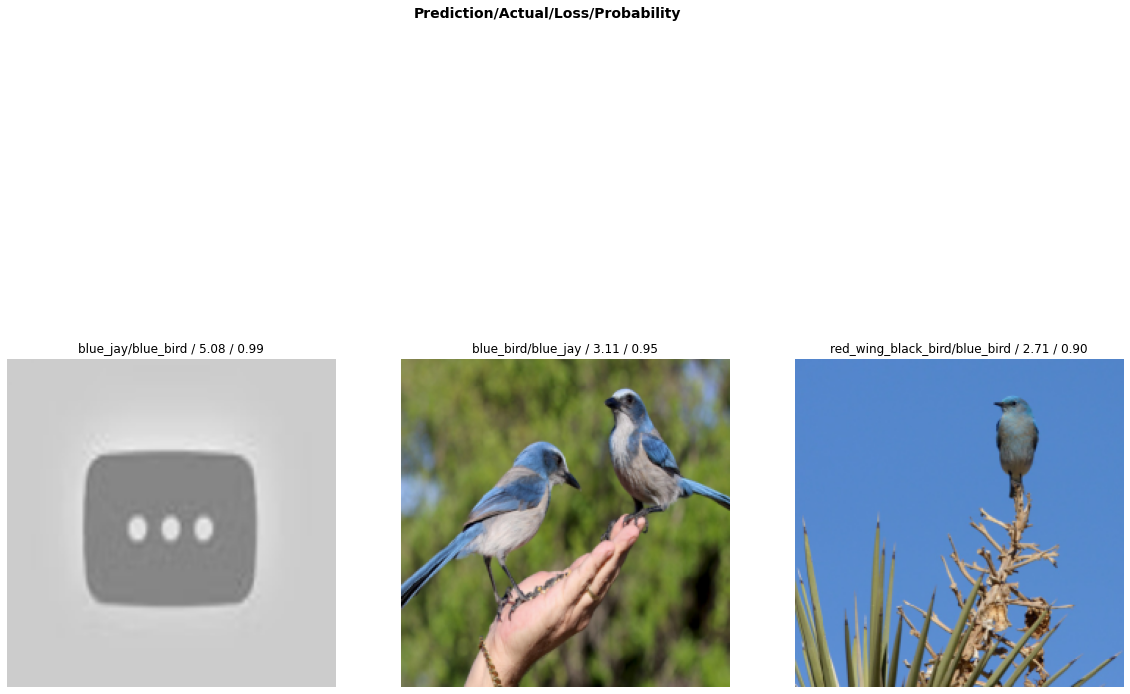

In [34]:
interp.plot_top_losses(3,figsize=(20,15))